In [15]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('updated_file.csv')
print(data)

      Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife  \
0        GAS            10         1:24:591        2.0    1.0       5.0   
1        GAS            10         1:23:795        3.0    1.0       6.0   
2        GAS            10         1:23:635        4.0    1.0       7.0   
3        GAS            10         1:23:402        5.0    1.0       8.0   
4        GAS            10         1:23:408        6.0    1.0       9.0   
...      ...           ...              ...        ...    ...       ...   
19309    PIA            81         1:47:269       46.0    2.0      31.0   
19310    PIA            81         1:47:060       47.0    2.0      32.0   
19311    PIA            81         1:47:488       48.0    2.0      33.0   
19312    PIA            81         1:47:547       49.0    2.0      34.0   
19313    PIA            81         1:47:258       50.0    2.0      35.0   

      Compound             Team  AirTemp  Humidity  Pressure  Rainfall  \
0         SOFT  Red Bull 

In [16]:
data.columns

Index(['Driver', 'DriverNumber', 'FormattedLapTime', 'LapNumber', 'Stint',
       'TyreLife', 'Compound', 'Team', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'track'],
      dtype='object')

In [17]:
print(data.dtypes)

Driver               object
DriverNumber          int64
FormattedLapTime     object
LapNumber           float64
Stint               float64
TyreLife            float64
Compound             object
Team                 object
AirTemp             float64
Humidity            float64
Pressure            float64
Rainfall               bool
TrackTemp           float64
WindDirection         int64
WindSpeed           float64
track                object
dtype: object


In [18]:
value_frequencies = data['Driver'].value_counts()
print(value_frequencies)

Driver
PER    1044
VER    1041
RUS    1028
NOR    1016
HAM    1003
GAS     994
BOT     974
SAI     945
LEC     918
STR     895
ALO     825
RIC     743
OCO     739
TSU     738
ALB     710
MAG     598
HUL     595
VET     565
ZHO     508
GIO     408
RAI     408
LAT     399
MSC     397
PIA     390
SAR     277
MAZ     197
GRO     197
KVY     189
KUB     174
COL     120
LAW     107
BEA     104
DEV      68
Name: count, dtype: int64


Added column LapTimeSeconds


In [19]:
import pandas as pd



# Function to convert "MM:SS:MMM" to total seconds
def convert_to_seconds(time_str):
    try:
        # Ensure the format is correct
        if len(time_str.split(':')) == 3:
            minutes, seconds, milliseconds = time_str.split(':')  # Split by ':'
            total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000  # Convert to seconds
            return total_seconds
        else:
            raise ValueError(f"Invalid time format: {time_str}")
    except Exception as e:
        print(f"Error processing {time_str}: {e}")
        return None  # Return None or any placeholder for incorrect formats

# Apply the conversion function to the FormattedLapTime column
data['LapTimeSeconds'] = data['FormattedLapTime'].apply(convert_to_seconds)

print(data)


      Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife  \
0        GAS            10         1:24:591        2.0    1.0       5.0   
1        GAS            10         1:23:795        3.0    1.0       6.0   
2        GAS            10         1:23:635        4.0    1.0       7.0   
3        GAS            10         1:23:402        5.0    1.0       8.0   
4        GAS            10         1:23:408        6.0    1.0       9.0   
...      ...           ...              ...        ...    ...       ...   
19309    PIA            81         1:47:269       46.0    2.0      31.0   
19310    PIA            81         1:47:060       47.0    2.0      32.0   
19311    PIA            81         1:47:488       48.0    2.0      33.0   
19312    PIA            81         1:47:547       49.0    2.0      34.0   
19313    PIA            81         1:47:258       50.0    2.0      35.0   

      Compound             Team  AirTemp  Humidity  Pressure  Rainfall  \
0         SOFT  Red Bull 

In [6]:
average_laps = data.groupby(['Driver', 'LapNumber'])['LapTimeSeconds'].mean().reset_index()



print(average_laps)

     Driver  LapNumber  LapTimeSeconds
0       ALB        2.0      108.434429
1       ALB        3.0      107.320714
2       ALB        4.0      107.447714
3       ALB        5.0      107.438000
4       ALB        6.0      106.988000
...     ...        ...             ...
1727    ZHO       52.0      101.738000
1728    ZHO       53.0      102.321667
1729    ZHO       54.0      102.046333
1730    ZHO       55.0      103.251000
1731    ZHO       56.0      103.881000

[1732 rows x 3 columns]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Get the unique drivers
drivers = average_laps['Driver'].unique()

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# Create individual scatter plots for each driver
for driver in drivers:
    # Filter data for the current driver
    driver_data = average_laps[average_laps['Driver'] == driver]
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='LapNumber', y='LapTimeSeconds', data=driver_data)
    
    # Add title and labels
    plt.title(f'Lap Times for {driver}')
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time (seconds)')
    
    # Show the plot
    plt.show()


NameError: name 'fastf1' is not defined

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (102.49 MB) C:\Users\Thakk\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
Request for URL https://ergast.com/api/f1/2023/4/laps/1.json failed; using cached response
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\urllib3\connection.py", line 

<Axes: xlabel='LapNumber', ylabel='LapTimeSeconds'>

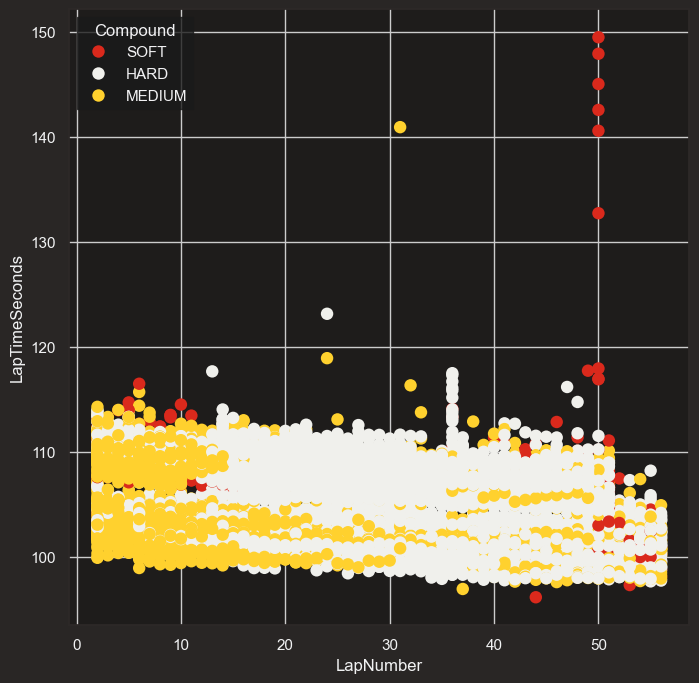

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=data,
                x="LapNumber",
                y="LapTimeSeconds",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')